<a href="https://colab.research.google.com/github/Kautkar-Ashish/Kautkar-Ashish/blob/main/Crop_Yeild_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('/content/crop_production (1).csv')  # Replace path as needed
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.shape

(246091, 7)

In [ ]:
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [ ]:
df.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [ ]:
df.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [ ]:
df.isnull().values.any()

np.True_

In [ ]:
df = df.dropna()
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [ ]:
df.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [ ]:
df['Yield'] = (df['Production'] / df['Area'])
df.head(5)

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.594896
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,0.500000
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,3.147059
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,3.642045
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,0.229167


<ipython-input-15-766fd8b79ba0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_production.values, y=avg_production.index, palette='viridis')


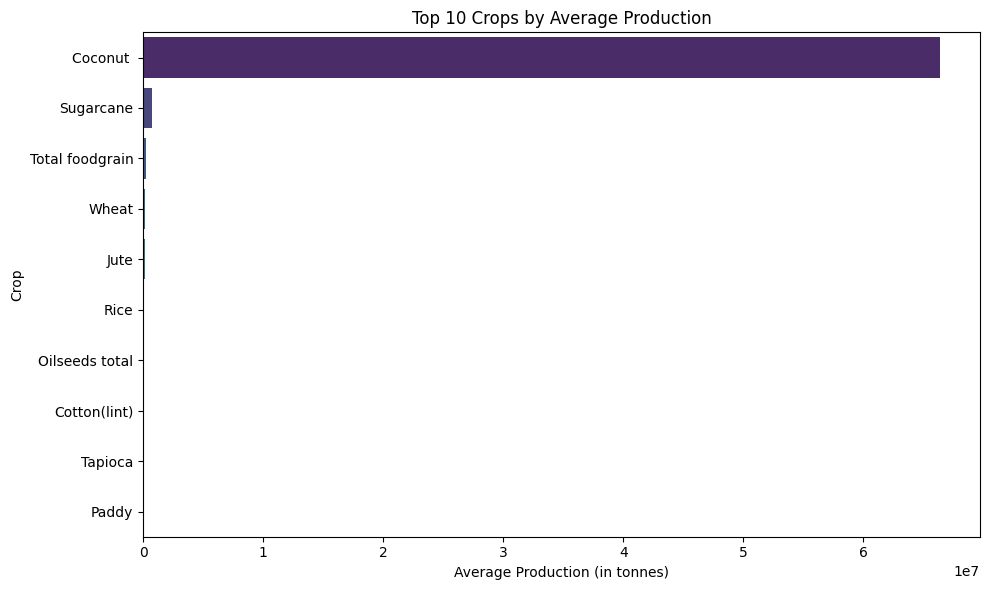

In [ ]:
avg_production = df.groupby('Crop')['Production'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_production.values, y=avg_production.index, palette='viridis')
plt.title("Top 10 Crops by Average Production")
plt.xlabel("Average Production (in tonnes)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

<ipython-input-16-e9ffd91ede2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_area.index, y=season_area.values, palette='coolwarm')


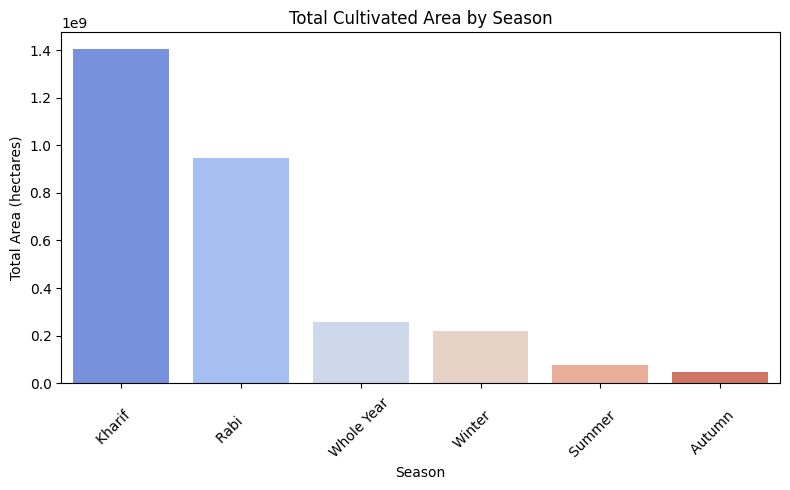

In [ ]:
season_area = df.groupby('Season')['Area'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=season_area.index, y=season_area.values, palette='coolwarm')
plt.title("Total Cultivated Area by Season")
plt.xlabel("Season")
plt.ylabel("Total Area (hectares)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-17-23d2e6b6179d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_production.values, y=state_production.index, palette='Spectral')


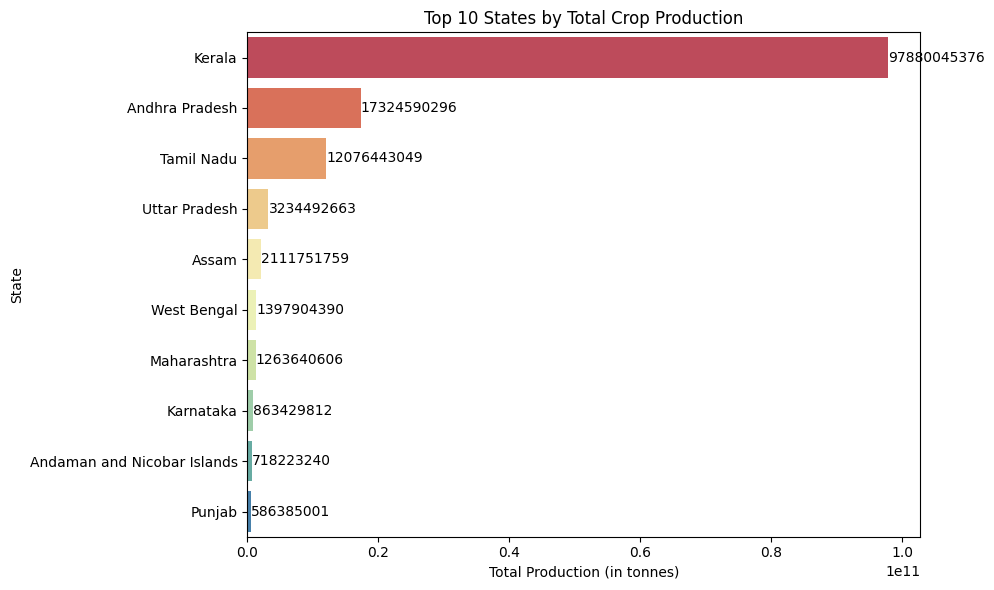

In [ ]:
# Group by State and calculate total production
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=state_production.values, y=state_production.index, palette='Spectral')
for i, v in enumerate(state_production.values):
    plt.text(v + 1e5, i, f'{v:.0f}', color='black', va='center')

plt.title("Top 10 States by Total Crop Production")
plt.xlabel("Total Production (in tonnes)")
plt.ylabel("State")
plt.tight_layout()
plt.show()

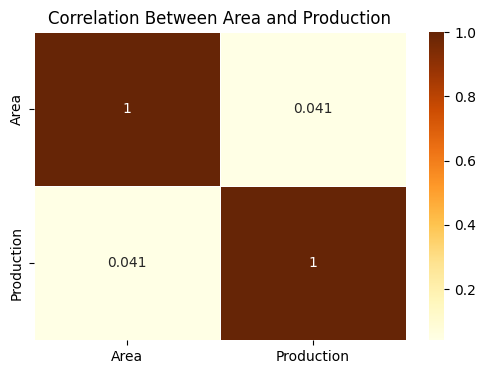

In [ ]:
df = pd.read_csv("/content/crop_production (1).csv")
numeric_df = df[['Area', 'Production']]
numeric_df = numeric_df.dropna()
corr = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Correlation Between Area and Production")
plt.show()

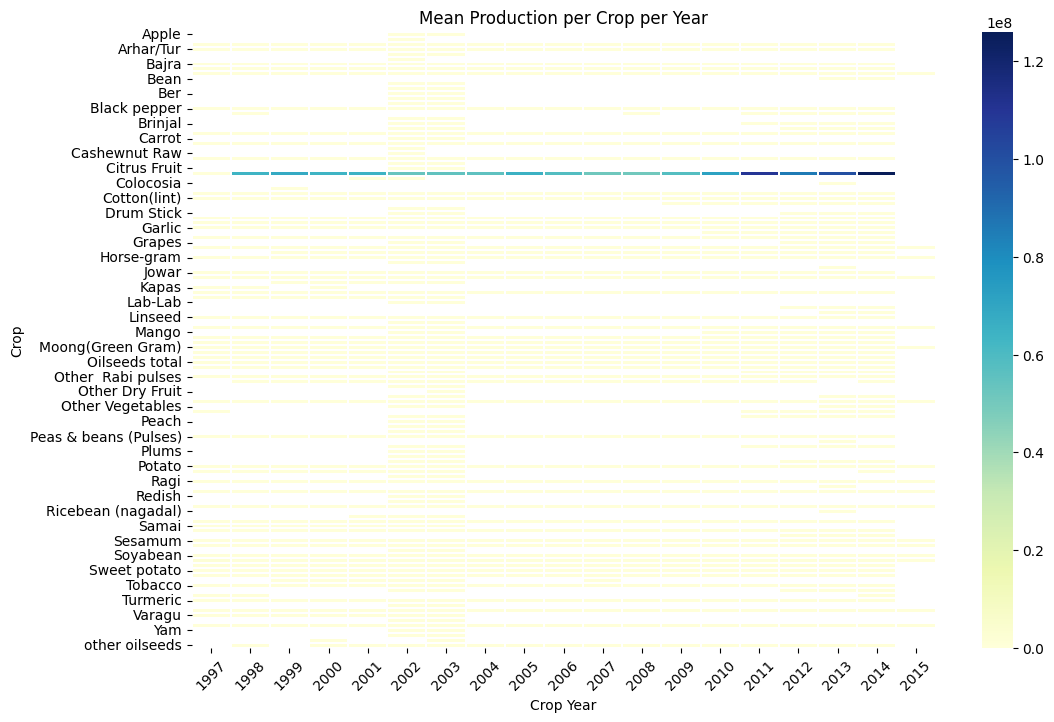

In [ ]:
# Create pivot table: mean production per crop per year
pivot_table = df.pivot_table(values='Production', index='Crop', columns='Crop_Year', aggfunc='mean')
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=0.3)
plt.title("Mean Production per Crop per Year")
plt.xlabel("Crop Year")
plt.ylabel("Crop")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Step 4: Data Preprocessing
# Drop rows with missing values (or use imputation if needed)
df = df.dropna()

# Drop unnecessary columns if any
df = df.drop(columns=['District_Name', 'State_Name'], errors='ignore')

# Convert categorical to numeric
le = LabelEncoder()
df['Season'] = le.fit_transform(df['Season'])
df['Crop'] = le.fit_transform(df['Crop'])

# Check updated DataFrame
df.head()

,Crop_Year,Season,Crop,Area,Production
0,2000,1,2,1254.0,2000.0
1,2000,1,74,2.0,1.0
2,2000,1,95,102.0,321.0
3,2000,4,7,176.0,641.0
4,2000,4,22,720.0,165.0


In [ ]:
# Step 5: Feature Selection and Splitting
X = df[['Area', 'Season', 'Crop', 'Production']]  # You may modify this
y = df['Yield'] if 'Yield' in df.columns else df['Production']  # Adjust target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Train ML Model (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Step 7: Evaluation
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

R2 Score: 0.9996817284640624
MSE: 128052671062.76416


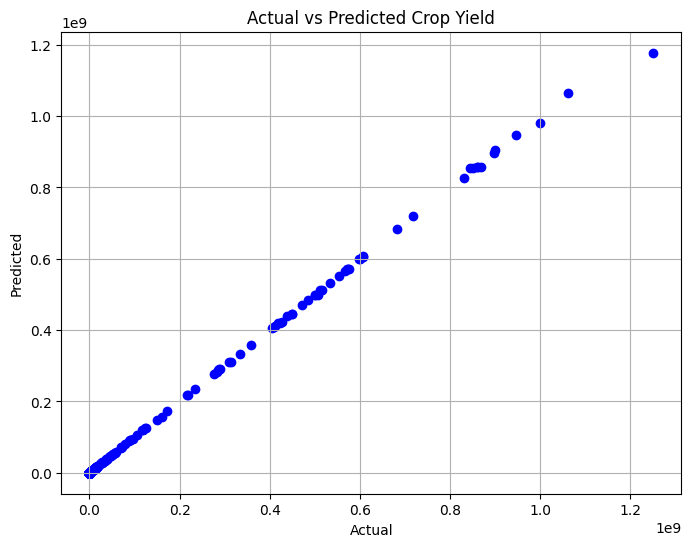

In [ ]:
# Step 8: Plot Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Crop Yield")
plt.grid(True)
plt.show()